<a href="https://colab.research.google.com/github/Mycal-A/cirrhosis-prediction-model/blob/main/Cirrosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#import the librari
import pandas as pd
import numpy as np

data = pd.read_csv('cirrhosis.csv')
data.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [ ]:
data.dtypes


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [ ]:
data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
data.isnull().values.any()

True

In [ ]:
#checking the columns with string values
features = []
_list = list(data.columns)
for i in _list:
  if data[i].dtype == 'object':
    features.append(i)
features


['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [ ]:
#Finding the unique values in the
for i in features:
  print(data[i].unique())

['D' 'C' 'CL']
['D-penicillamine' 'Placebo' nan]
['F' 'M']
['Y' 'N' nan]
['Y' 'N' nan]
['Y' 'N' nan]
['Y' 'N' 'S']


In [ ]:
data = data.dropna(subset=['Drug'])


In [ ]:
data.isnull().sum()


ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(data.iloc[:,10:-1])

data.iloc[:,10:-1] = si.transform(data.iloc[:,10:-1])

In [ ]:
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
list_status = list(data["Status"])

status = []
for i in range(len(list_status)):
  if list_status[i] == 'D':
    status.append(0)
  elif list_status[i] == "C":
    status.append(1)
  else:
    status.append(2)

status


[0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,


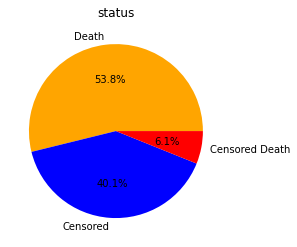

In [ ]:
#Visualization
import matplotlib.pyplot as plt

plt.pie(data['Status'].value_counts(),labels=['Death','Censored', 'Censored Death'],autopct='%1.1f%%',colors=['orange','blue','red'])
plt.title('status')
plt.show()

In [ ]:
data['status'] = status

data = data.drop(["Status"], axis = 1)

data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [ ]:
print((data["Age"].values/365).round())

[59. 56. 70. 55. 38. 66. 56. 53. 43. 71. 54. 59. 46. 56. 65. 40. 52. 54.
 50. 60. 64. 56. 56. 45. 45. 52. 54. 45. 64. 41. 42. 54. 51. 52. 49. 56.
 62. 37. 55. 47. 34. 34. 49. 38. 42. 46. 47. 49. 61. 54. 52. 51. 67. 39.
 66. 34. 54. 45. 40. 58. 44. 61. 47. 63. 40. 46. 51. 33. 49. 56. 49. 33.
 39. 52. 44. 52. 50. 48. 47. 67. 63. 67. 56. 56. 47. 53. 37. 41. 52. 33.
 46. 77. 37. 54. 46. 49. 72. 29. 49. 52. 45. 57. 49. 43. 34. 69. 63. 50.
 44. 39. 41. 55. 51. 53. 43. 61. 50. 49. 54. 35. 68. 55. 46. 53. 47. 54.
 44. 42. 64. 44. 62. 41. 63. 42. 43. 56. 63. 51. 47. 54. 47. 56. 46. 52.
 51. 34. 75. 31. 62. 35. 55. 70. 50. 69. 44. 59. 49. 37. 46. 57. 43. 59.
 54. 43. 53. 41. 61. 48. 36. 49. 53. 50. 30. 56. 52. 42. 55. 70. 44. 43.
 45. 57. 40. 38. 48. 71. 36. 63. 51. 55. 53. 53. 57. 44. 30. 57. 45. 36.
 41. 32. 41. 62. 37. 63. 49. 62. 73. 61. 53. 50. 53. 47. 50. 69. 41. 59.
 36. 35. 43. 64. 57. 46. 61. 39. 39. 57. 59. 37. 62. 35. 58. 50. 43. 34.
 33. 38. 60. 66. 47. 56. 41. 65. 68. 45. 46. 33. 41

In [ ]:
#Converting the days to age
data["Age"] = (data["Age"].values/365).round()
data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [ ]:
#Transform the data (from non-numeric to numeric)
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
  if data[col].dtype == np.number:
    continue
  data[col] = LabelEncoder().fit_transform(data[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


In [ ]:
data.head(50)

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,0,22,0,59.0,0,1,1,1,2,14.5,261.000000,2.60,156.0,1718.0,137.95,172.000000,190.000000,12.2,4.0,0
1,1,297,0,56.0,0,0,1,1,0,1.1,302.000000,4.14,54.0,7394.8,113.52,88.000000,221.000000,10.6,3.0,1
2,2,63,0,70.0,1,0,0,0,1,1.4,176.000000,3.48,210.0,516.0,96.10,55.000000,151.000000,12.0,4.0,0
3,3,153,0,55.0,0,0,1,1,1,1.8,244.000000,2.54,64.0,6121.8,60.63,92.000000,183.000000,10.3,4.0,0
4,4,116,1,38.0,0,0,1,1,0,3.4,279.000000,3.53,143.0,671.0,113.15,72.000000,136.000000,10.9,3.0,2
5,5,203,1,66.0,0,0,1,0,0,0.8,248.000000,3.98,50.0,944.0,93.00,63.000000,261.935065,11.0,3.0,0
6,6,148,1,56.0,0,0,1,0,0,1.0,322.000000,4.09,52.0,824.0,60.45,213.000000,204.000000,9.7,3.0,1
7,7,200,1,53.0,0,0,0,0,0,0.3,280.000000,4.00,52.0,4651.2,28.38,189.000000,373.000000,11.0,3.0,0
8,8,194,0,43.0,0,0,0,1,0,3.2,562.000000,3.08,79.0,2276.0,144.15,88.000000,251.000000,11.0,2.0,0
9,9,1,1,71.0,0,1,0,1,2,12.6,200.000000,2.74,140.0,918.0,147.25,143.000000,302.000000,11.5,4.0,0


In [ ]:
#Remove the unwanted columns
data = data.drop('ID',axis=1)
data.head(400)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,22,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,297,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,63,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,153,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,116,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,73,0,61.0,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,1
308,60,1,58.0,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,1
309,55,0,62.0,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,1
310,46,0,38.0,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,1


In [ ]:
#Splitting the data
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)


In [ ]:
print(x_train)

[[ 63.    0.   70.  ... 151.   12.    4. ]
 [223.    0.   49.  ... 263.    9.    3. ]
 [ 76.    0.   44.  ... 268.   11.5   4. ]
 ...
 [287.    1.   39.  ... 265.   11.    1. ]
 [269.    1.   40.  ... 198.   10.8   3. ]
 [ 77.    1.   36.  ... 295.   10.1   3. ]]


In [ ]:
#Using XGBClassifier

from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(x_train, y_train) #Training the data

XGBClassifier(objective='multi:softprob')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


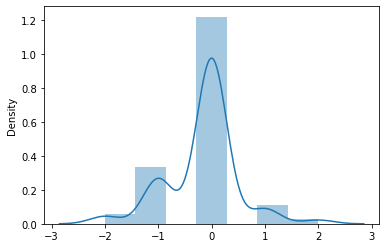

In [ ]:
#Plotting the distance plot
import seaborn as sns
sns.distplot(y_test-y_pred)

In [ ]:
#Step 6: Measure the performance
from sklearn import metrics

#Predicting the values
y_pred = xgc.predict(x_test)

acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy of the model: ',acc*100)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

true_negative = cm[1][1]
true_positive = cm[0][0]
false_neg = cm[1][0]
false_pos = cm[0][1]

Precision_value = true_positive / (true_positive + false_pos)
recall_value = true_positive / (true_positive + false_neg)
f_value = (2 * Precision_value * recall_value) / (Precision_value + recall_value)
acc = metrics.accuracy_score(y_test,y_pred)


print("Accuracy:",acc * 100)
print("Precision:",Precision_value * 100)
print("F1 Measure:",f_value * 100)
print("Recall:",recall_value * 100)

Accuracy of the model:  69.84126984126983
Accuracy: 69.84126984126983
Precision: 55.55555555555556
F1 Measure: 69.76744186046511
Recall: 93.75


In [ ]:
  input_data = (116,	1,	38.0,	0, 0,	1,	1,	0,	3.4,	279.0,	3.53,	143.0,	671.0,	113.15,	72.0,	136.0,	10.9,	3.0)

  input_data_array = np.asarray(input_data)
  reshape_data = input_data_array.reshape(1,-1)

  prediction = xgc.predict(reshape_data)

  if(prediction[0]== 0):
    print("Death")
  elif (prediction[0] == 1):
    print("Censored")
  else:
    print("Censored Liver")


Censored Liver


In [ ]:
xgc.predict([[116,	1,	38.0,	0,	0,	1,	1,	0,	3.4,	279.000000,	3.53,	143.0,	671.0,	113.15,	72.000000,	136.000000,	10.9,	3.0]])

array([2])

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf.fit(x_train, y_train)
y_predRf = rf.predict(x_test)

acc_f = metrics.accuracy_score(y_test,y_predRf)
print('Accuracy of the model: ',acc_f*100)

cm = confusion_matrix(y_true=y_test, y_pred=y_predRf)

true_negative = cm[1][1]
true_positive = cm[0][0]
false_neg = cm[1][0]
false_pos = cm[0][1]

Precision_value = true_positive / (true_positive + false_pos)
recall_value = true_positive / (true_positive + false_neg)
f_value = (2 * Precision_value * recall_value) / (Precision_value + recall_value)
acc = metrics.accuracy_score(y_test,y_predRf)


print("Accuracy:",acc * 100)
print("Precision:",Precision_value * 100)
print("F Measure:",f_value * 100)
print("Recall:",recall_value * 100)

Accuracy of the model:  69.84126984126983
Accuracy: 69.84126984126983
Precision: 55.172413793103445
F Measure: 68.08510638297872
Recall: 88.88888888888889


In [ ]:
rf.predict([[153,	0,	55.0,	0,	0,	1,	1,	1,	1.8,	244.0,	2.54,	64.0,	6121.8,	60.63,	92.0,	183.0,	10.3,	4.0	]])

array([1])

In [ ]:
import statsmodels.api as sm

In [ ]:
mod = sm.OLS(Y, X)
result = mod.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              34.25
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                    2.14e-61
Time:                        03:47:46   Log-Likelihood:                         -228.02
No. Observations:                 312   AIC:                                      492.0
Df Residuals:                     294   BIC:                                      559.4
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.000      1.600      0.111      -0.000       0.002
x2             0.0083      0.060      0.137      0.891      -0.111       0.127
x3            -0.0083      0.003     -2.802      0.005      -0.014      -0.002
x4            -0.1520      0.101     -1.507      0.133      -0.350       0.046
x5            -0.1816      0.145     -1.253      0.211      -0.467       0.104
x6            -0.0320      0.070     -0.454      0.650      -0.171       0.107
x7            -0.0812      0.075     -1.087      0.278      -0.228       0.066
x8             0.0198      0.074      0.268      0.789      -0.125       0.165
x9            -0.0226      0.010     -2.247      0.025      -0.042      -0.003
x10         7.933e-06      0.000      0.050      0.960      -0.000       0.000
x11            0.2559      0.069      3.700      0.000       0.120       0.392
x12         7.817e-05      0.000      0.179      0.858      -0.001       0.001
x13        -5.487e-05   1.49e-05     -3.673      0.000   -8.43e-05   -2.55e-05
x14           -0.0004      0.001     -0.601      0.548      -0.002       0.001
x15            0.0004      0.001      0.641      0.522      -0.001       0.001
x16            0.0008      0.000      2.256      0.025    9.79e-05       0.001
x17           -0.0032      0.027     -0.117      0.907      -0.056       0.050
x18            0.0428      0.041      1.043      0.298      -0.038       0.124
==============================================================================
Omnibus:                       13.606   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.099
Skew:                           0.432   Prob(JB):                     0.000526
Kurtosis:                       3.643   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_____________Confusion Matrix for Decision Tree Classifier___________
[[18  9  2]
 [ 4 22  4]
 [ 1  2  1]]
--------------Decision Tree Performance Measure----------

Precision Value - 66.66666666666666
Recall Value - 81.81818181818183
F Value - 73.46938775510203
[[18  9  2]
 [ 4 22  4]
 [ 1  2  1]]
Acuraccy:  65.07936507936508


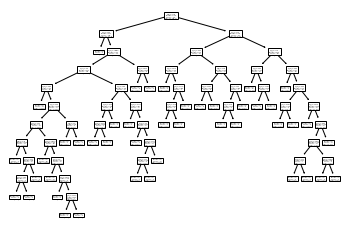

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train,y_train)

from sklearn import tree
tree.plot_tree(clf)

y_predCl = clf.predict(x_test)

#Step 6: Measure the performance
from sklearn import metrics

print('_____________Confusion Matrix for Decision Tree Classifier___________')

cm = confusion_matrix(y_test, y_predCl)
print(cm)

true_negative = cm[1][1]
true_positive = cm[0][0]
false_neg = cm[1][0]
false_pos = cm[0][1]

Precision_value = true_positive / (true_positive + false_pos)
recall_value = true_positive / (true_positive + false_neg)
f_value = (2 * Precision_value * recall_value) / (Precision_value + recall_value)

print("--------------Decision Tree Performance Measure----------")
print("")
print("Precision Value -" ,Precision_value*100)
print("Recall Value -" ,recall_value*100)
print("F Value -",f_value*100)


print(cm)
acc = metrics.accuracy_score(y_test,y_predCl)
print("Acuraccy: ",acc*100)